### Lending Club Case Study

<b>Problem Statement</b> : <br>
    Given a loan.csv file, using this identify the scenarios where a loan applicant might be a defaulter(the one who wouldn't   payback the money to company), So that this helps the company to not loose money.

In [1]:
# let's add all required Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#read the CSV file using Pandas and print the basic info of the CSV File
loan = pd.read_csv("loan.csv", sep=",")
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [3]:
#The below code snippet will generate a report.html file which will help us understand each column data better, for example how many distinct values are present in each column,number of empty values etc
!pip install pandas_profiling
import pandas as pd
from pandas_profiling import ProfileReport
design_report = ProfileReport(loan)
design_report.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Step 1 : Understanding the Data

In [4]:
#helps to show us the first 5 rows data, so we can check how actual data looks like
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
loan.columns #shows list of all the columns present in our csv file

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

### Step 2 : Data Cleaning ->  lets clean the data to have relevant data for the analysis.

In [6]:
# lets drop all columns having only NaN values in column
loan.dropna(axis=1, how='all', inplace=True) 

In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

<b>As we can see now we have only 57 Columns after removing all The columns which had only NaN values, lets do more data cleaning to see if we can reduce any other Columns</b>

In [8]:
#lets remove all the Columns where we have only one unique value in it's column
#we are removing this because having only one unique value in the column won't help us come to any conclusion about defaulters.
columns_with_one_unique_value = loan.columns[loan.nunique() == 1].tolist()
print(columns_with_one_unique_value)

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


<b>As we can see there are few columns with only one unique value, lets remove them from our dataframe</b>

In [9]:
#drop all the Columns with only one unique value
loan.drop(columns_with_one_unique_value, axis=1, inplace=True)

In [10]:
loan.shape

(39717, 48)

<b>Now we are left with 48 columns after deleting all the columns with only one unique value</b>

<b>The data now looks more cleaner, now lets check if we will have to convert any type of the column into different datatype</b>

In [11]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [12]:
# The column int_rate is character type, let's convert it to float
#we are converting it into float, to have better analyis using int rate
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [13]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  float64
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

<b>Since emp length has string value like 3 years, 2 years etc. Lets fetch only the numeric value from it us it in our analysis</b>

In [14]:
#drop the missing values emp length column
loan = loan[~loan['emp_length'].isnull()]

#lets use regex to fetch only numeric values from the column
import re
loan['emp_length'] = loan['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

#after fetching the numeric value lets convert the emp length to numeric data type
loan['emp_length'] = loan['emp_length'].apply(lambda x: pd.to_numeric(x))

In [15]:
#check column type to reverify if it's changes or not
loan.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38642 non-null  int64  
 1   member_id                38642 non-null  int64  
 2   loan_amnt                38642 non-null  int64  
 3   funded_amnt              38642 non-null  int64  
 4   funded_amnt_inv          38642 non-null  float64
 5   term                     38642 non-null  object 
 6   int_rate                 38642 non-null  float64
 7   installment              38642 non-null  float64
 8   grade                    38642 non-null  object 
 9   sub_grade                38642 non-null  object 
 10  emp_title                37202 non-null  object 
 11  emp_length               38642 non-null  int64  
 12  home_ownership           38642 non-null  object 
 13  annual_inc               38642 non-null  float64
 14  verification_status   

### Step 3 : After the data has been cleaned, let's identify the fields which can be used and cannot be used to predict the defaulters.

In [16]:
#below are some of the behavioural data which were generared post the loan has been given to the applicant
#We cannot use these data Since these data won't be avialble When a Customer applies for loan
behaviour_var =  [
  "delinq_2yrs", 
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
    "next_pymnt_d"]

loan_data_cleaned = loan.drop(behaviour_var, axis=1)
loan_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      38642 non-null  int64  
 1   member_id               38642 non-null  int64  
 2   loan_amnt               38642 non-null  int64  
 3   funded_amnt             38642 non-null  int64  
 4   funded_amnt_inv         38642 non-null  float64
 5   term                    38642 non-null  object 
 6   int_rate                38642 non-null  float64
 7   installment             38642 non-null  float64
 8   grade                   38642 non-null  object 
 9   sub_grade               38642 non-null  object 
 10  emp_title               37202 non-null  object 
 11  emp_length              38642 non-null  int64  
 12  home_ownership          38642 non-null  object 
 13  annual_inc              38642 non-null  float64
 14  verification_status     38642 non-null

In [17]:
#lets remove url,desc,purpose fields as we are not going to use these field for analysis as of now
#as these columns are not of any relevence for our analysis.
loan_data_cleaned = loan_data_cleaned.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)
loan_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      38642 non-null  int64  
 1   member_id               38642 non-null  int64  
 2   loan_amnt               38642 non-null  int64  
 3   funded_amnt             38642 non-null  int64  
 4   funded_amnt_inv         38642 non-null  float64
 5   term                    38642 non-null  object 
 6   int_rate                38642 non-null  float64
 7   installment             38642 non-null  float64
 8   grade                   38642 non-null  object 
 9   sub_grade               38642 non-null  object 
 10  emp_title               37202 non-null  object 
 11  emp_length              38642 non-null  int64  
 12  home_ownership          38642 non-null  object 
 13  annual_inc              38642 non-null  float64
 14  verification_status     38642 non-null

In [18]:
#lets check for the count of each Loan status values in our Data
loan_data_cleaned['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

<b>As we can see out of all the record, most of the loan status is Fully paid, followed by Charged off and Current</b>

In [19]:
#let's filter out data by using loan status and take only Fully paid and Charged off records
#we cannot use Current records, since there loan is still in progress
loan_data_cleaned = loan_data_cleaned[loan_data_cleaned['loan_status'] != 'Current']
loan_data_cleaned['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Name: loan_status, dtype: int64

### Step 4 : Lets start with Univariate Analysis with the data we have

In [20]:
#Let's change the value of "Fully Paid" to 0 and "Charged Off" to 1
#changing it to Numerical values as we can use it to find the default rate 
loan_data_cleaned['loan_status'] = loan_data_cleaned['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
loan_data_cleaned['loan_status'] = loan_data_cleaned['loan_status'].apply(lambda x: pd.to_numeric(x))

loan_data_cleaned['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

In [21]:
#removing these columns since they doesn't have any impact on defaulters
loan_data_cleaned = loan_data_cleaned.drop(['id','member_id','emp_title','desc'],axis=1)
loan_data_cleaned['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

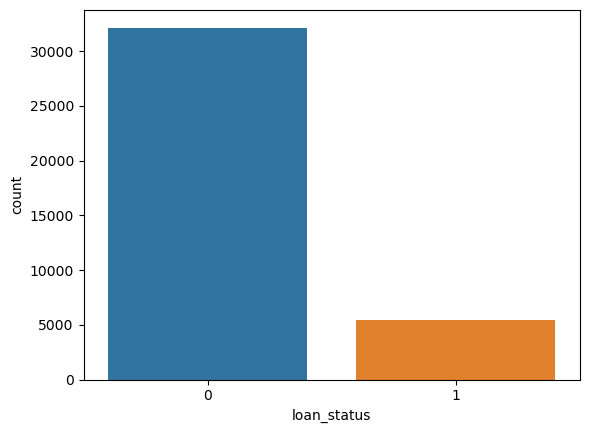

In [22]:
sns.countplot(x=loan_data_cleaned['loan_status'])
plt.show()

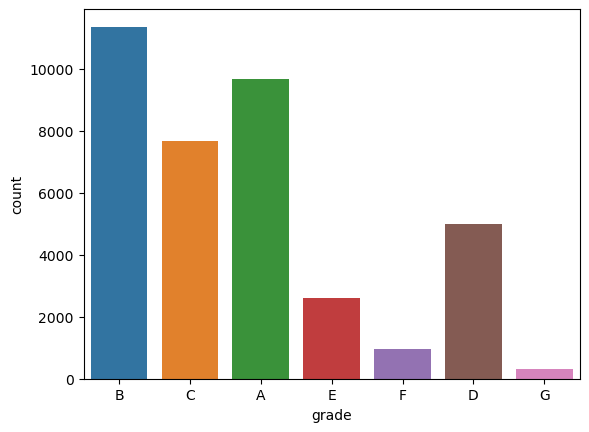

In [23]:
sns.countplot(x=loan_data_cleaned['grade'])
plt.show()

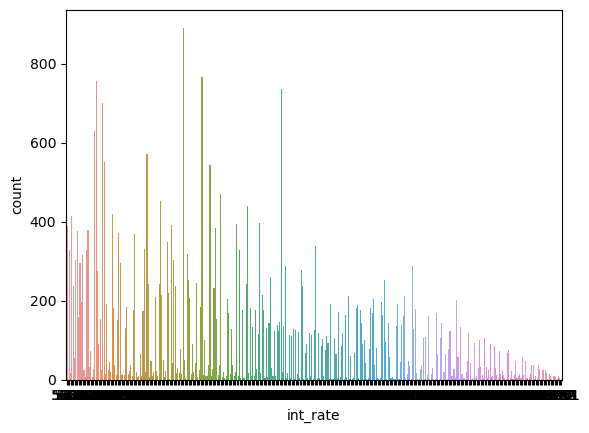

In [24]:
sns.countplot(x=loan_data_cleaned['int_rate'])
plt.show()

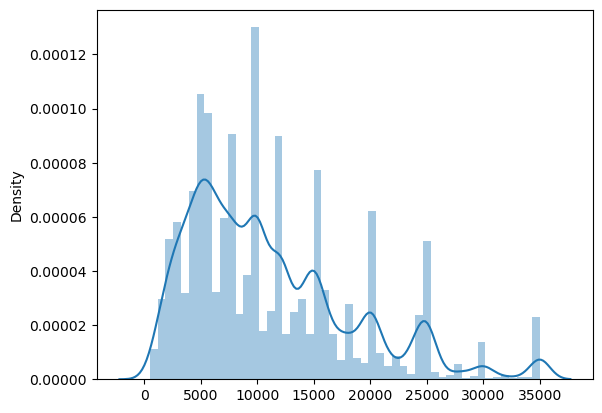

In [25]:
sns.distplot(x=loan_data_cleaned['loan_amnt'])
plt.show()

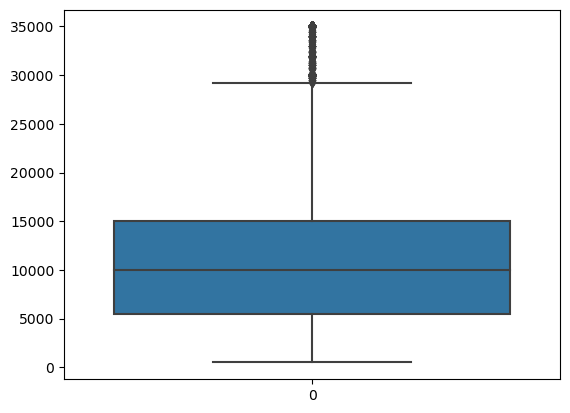

In [26]:
sns.boxplot(loan_data_cleaned['loan_amnt'])
plt.show()

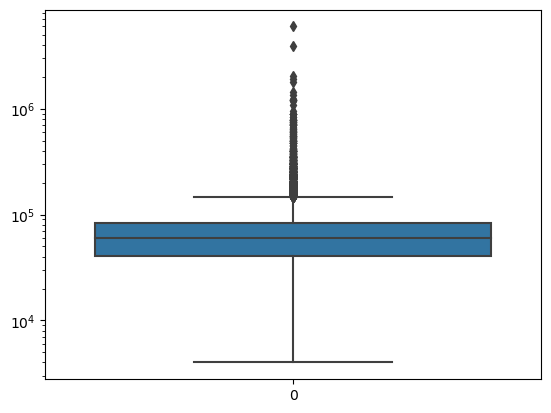

In [27]:
sns.boxplot(loan_data_cleaned['annual_inc'])
plt.yscale('log')
plt.show()

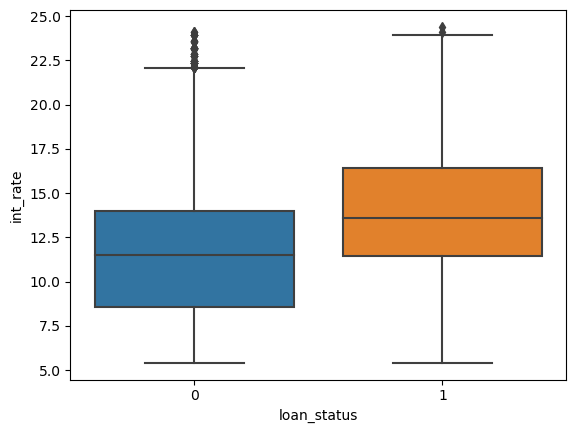

In [28]:
#let's check for relationship between int_rate and loan_status
sns.boxplot(x = 'loan_status', y = 'int_rate' ,data=loan_data_cleaned)
plt.show()

<b>As we can see when the interest rate is more than about 13%, there are more defaulters compared to Fully paid.</b>

In [29]:
#lets check what' the default rate
round(np.mean(loan_data_cleaned['loan_status']), 2)

0.14

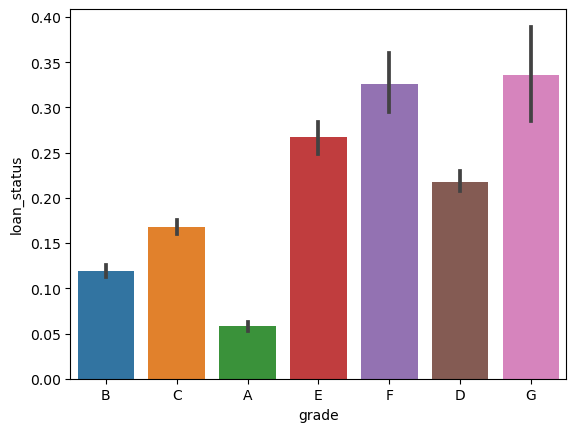

In [30]:
# plotting default rates across grade of the loan
sns.barplot(x='grade', y='loan_status', data=loan_data_cleaned)
plt.show()

<b>As we can see default rate is much higher for Grade 'G' and 'F' & Grade 'A' is very less</b>

In [31]:
#let's check how many defaulters are there when grade is 'G'
G = loan_data_cleaned[loan_data_cleaned['grade']=='G']
G['loan_status'].value_counts()

0    198
1    100
Name: loan_status, dtype: int64

<b>There are 100 defaulters and 198 fully paid which i like for 3 Customers with 'G' Grade we can expect one Defaulter
As seen earlier we saw that there were more defaulters when int_rate was more than 13%, let check for the count</b>

In [32]:
grade_int = loan_data_cleaned[(loan_data_cleaned['grade']=='G') & (loan_data_cleaned['int_rate'] > 13)]
grade_int['loan_status'].value_counts()

0    198
1    100
Name: loan_status, dtype: int64

<b>As we can see when Grade is 'G' and int_rate is more than 13% 1 out of 3 customers are defaulters, lets check whats the ratio when Grade is F</b>

In [33]:
f_grade_int = loan_data_cleaned[(loan_data_cleaned['grade']=='F') & (loan_data_cleaned['int_rate'] > 13)]
f_grade_int['loan_status'].value_counts()

0    646
1    313
Name: loan_status, dtype: int64

<b>Its almost like 2 out of 1 customer where grade is F and int rate is more than 13% turns out to be a defaulter(48.45%)</b>

In [34]:
#defining a function to plot loan_status across categorical data
def plot_cat(cat_var):
    sns.barplot(x=cat_var, y='loan_status', data=loan_data_cleaned)
    plt.show()

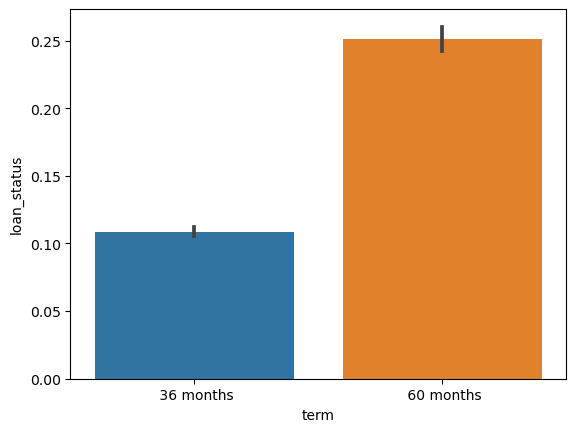

In [35]:
plot_cat('term')

<b>Default rate is around 25% when the term is 60months</b>

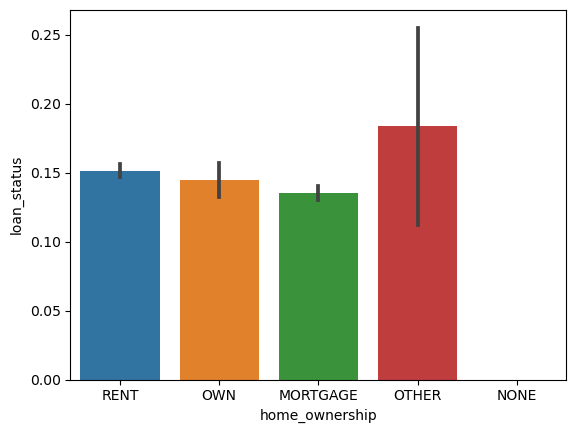

In [36]:
plot_cat('home_ownership')

<b>Default rate for house ownership tends to be same for all excpet "other" Option</b>

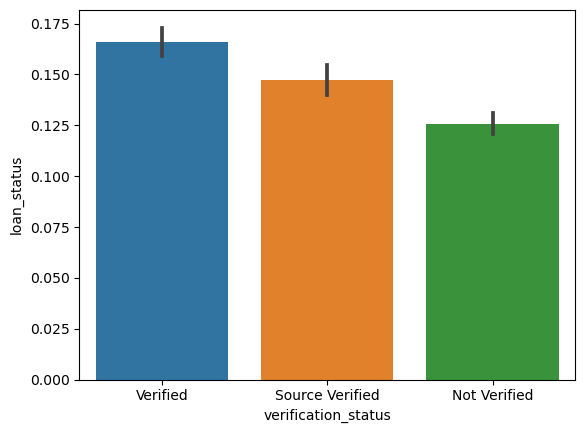

In [37]:
#when loan status is verified the default rate is more compared to Not Verified
plot_cat('verification_status')

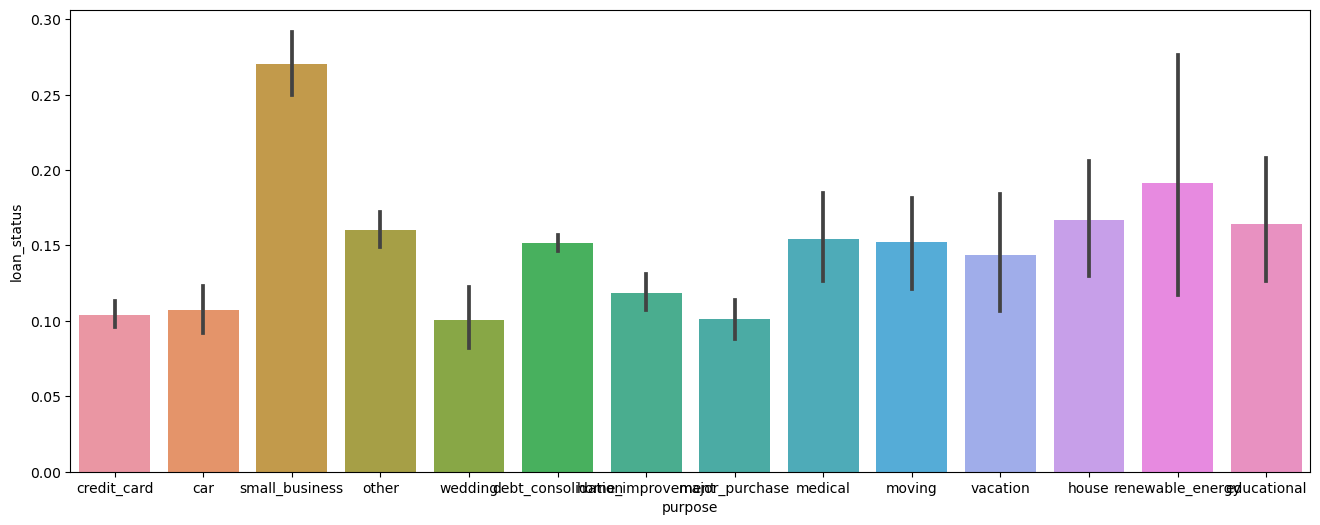

In [38]:
plt.figure(figsize=(16, 6))
plot_cat('purpose')

<b>As we can see "small business" tend to have more default compared to other Purpose of the loan</b>

In [39]:
#we have a column "issue_d" where it has data of month and year
#let's split the data into month and year and use it for our analysis
loan_data_cleaned['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [40]:
from datetime import datetime
loan_data_cleaned['issue_d'] = loan_data_cleaned['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [41]:
#lets create separate column for month and year using issue_d
loan_data_cleaned['issue_month'] = loan_data_cleaned['issue_d'].apply(lambda x: x.month)
loan_data_cleaned['issue_year'] = loan_data_cleaned['issue_d'].apply(lambda x: x.year)

In [42]:
loan_data_cleaned.groupby('issue_year').issue_year.count()

issue_year
2007      251
2008     1562
2009     4716
2010    11214
2011    19801
Name: issue_year, dtype: int64

<b>As we can see we see most of the loans were issued in year 2010 and 2011</b>

In [43]:
loan_data_cleaned.groupby('issue_month').issue_month.count()

issue_month
1     2331
2     2278
3     2632
4     2756
5     2838
6     3094
7     3253
8     3321
9     3394
10    3637
11    3890
12    4120
Name: issue_month, dtype: int64

<b>The third and fourth quarter month have issued more loans compared to 1st and 2nd</b>

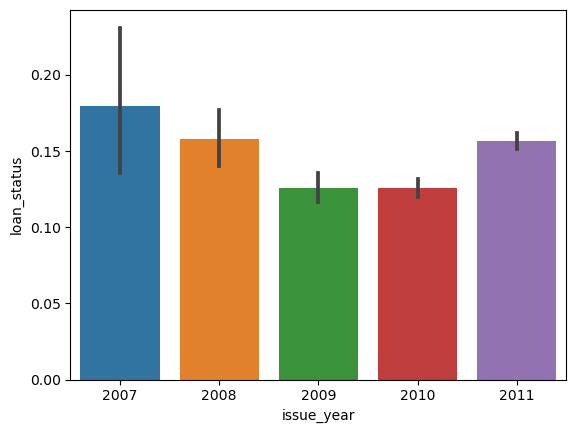

In [44]:
plot_cat('issue_year')

<b>Default rate is high for the loans which were issued in the year 2007</b>

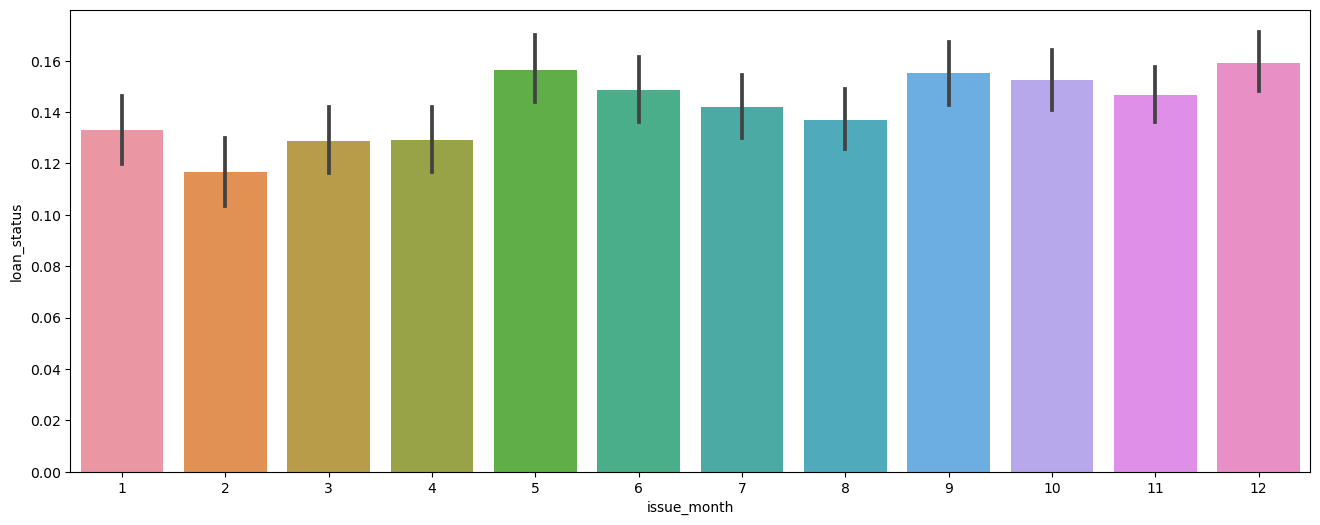

In [45]:
plt.figure(figsize=(16, 6))
plot_cat('issue_month')

<b>Let's now analyse how the default rate varies across continuous variables.</b>

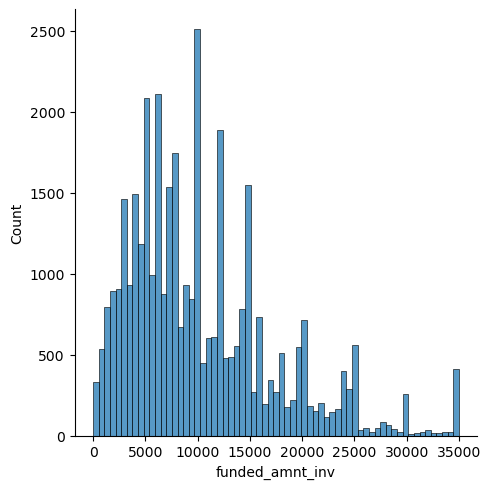

In [46]:
sns.displot(loan_data_cleaned['funded_amnt_inv'])
plt.show()

In [47]:
#lets categorise the continuous variables into categories which will make our analysis easier
def amount_category(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'

In [48]:
loan_data_cleaned['funded_amnt_inv'] = loan_data_cleaned['funded_amnt_inv'].apply(lambda x: amount_category(x))

In [49]:
loan_data_cleaned['funded_amnt_inv'].value_counts()

medium       20510
low           9040
high          6658
very high     1336
Name: funded_amnt_inv, dtype: int64

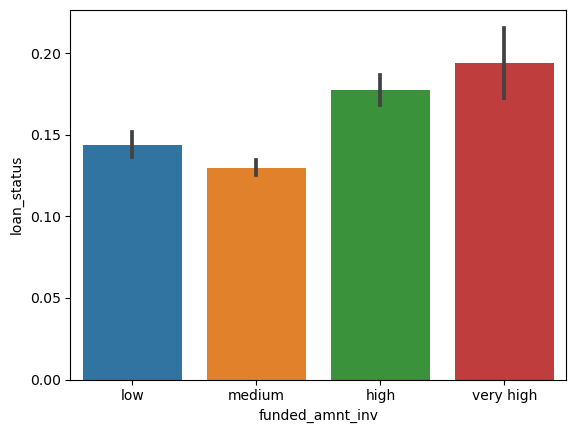

In [50]:
#as we can see more than 50% of the records fall under medium category for funded_amnt_inv
#lets check how is the default rate for these categorical values which we have defined
plot_cat('funded_amnt_inv')

<b>As we can see when the category is Very High for funded_amnt_inv the default rate is more</b>

In [51]:
#dropping few columns to exclude irrelevant data to form correlation  
dataframe_for_corr = loan_data_cleaned.drop(['mths_since_last_delinq', 'mths_since_last_record', 'pub_rec_bankruptcies'], axis=1)
dataframe_for_corr.corr()

,loan_amnt,funded_amnt,int_rate,installment,emp_length,annual_inc,loan_status,dti,issue_month,issue_year
loan_amnt,1.000000,0.981603,0.299237,0.931686,0.148267,0.266282,0.062680,0.061402,0.052812,0.115074
funded_amnt,0.981603,1.000000,0.302955,0.957721,0.147930,0.261959,0.059535,0.061251,0.042576,0.126093
int_rate,0.299237,0.302955,1.000000,0.274791,-0.000602,0.046092,0.213497,0.112188,0.026176,0.044083
installment,0.931686,0.957721,0.274791,1.000000,0.121101,0.264684,0.029868,0.050727,0.029796,0.057550
emp_length,0.148267,0.147930,-0.000602,0.121101,1.000000,0.111107,0.016656,0.048619,0.022054,0.115340
annual_inc,0.266282,0.261959,0.046092,0.264684,0.111107,1.000000,-0.038501,-0.123582,0.009557,0.012689
loan_status,0.062680,0.059535,0.213497,0.029868,0.016656,-0.038501,1.000000,0.042803,0.025811,0.022816
dti,0.061402,0.061251,0.112188,0.050727,0.048619,-0.123582,0.042803,1.000000,0.012125,0.094332
issue_month,0.052812,0.042576,0.026176,0.029796,0.022054,0.009557,0.025811,0.012125,1.000000,-0.035307
issue_year,0.115074,0.126093,0.044083,0.057550,0.115340,0.012689,0.022816,0.094332,-0.035307,1.000000


<b> There is negative correlation between annual_inc and loan status, annual_inc and dti,emp_length and int_rate</b><br>
<b> All other fields are having positive correlation with funded_amnt and loan_amnt having highest correlation<b>

<b>Lets categorise the values for loan_amount field as well</b>

In [52]:
loan_data_cleaned['loan_amnt'] = loan_data_cleaned['loan_amnt'].apply(lambda x: amount_category(x))

In [53]:
loan_data_cleaned['loan_amnt'].value_counts()

medium       20157
high          7572
low           7095
very high     2720
Name: loan_amnt, dtype: int64

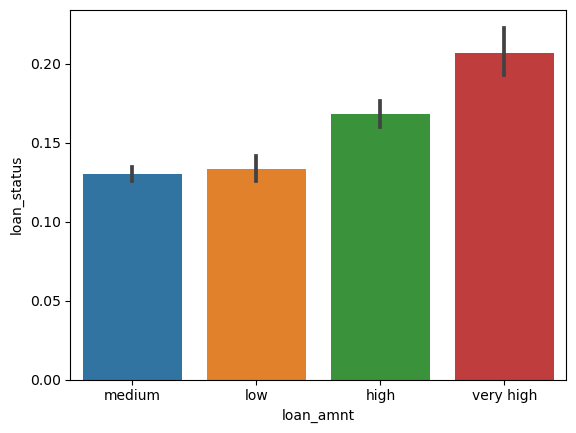

In [54]:
#even for the loan_amnt field we see most the values fall under medium catgeory
#lets check default rate for these catgeories
plot_cat('loan_amnt')

<b>When loan amount is Very high we see that the deafult rate is higher</b>

In [55]:
# lets also convert interest rate to low, medium, high
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
loan_data_cleaned['int_rate'] = loan_data_cleaned['int_rate'].apply(lambda x: int_rate(x))

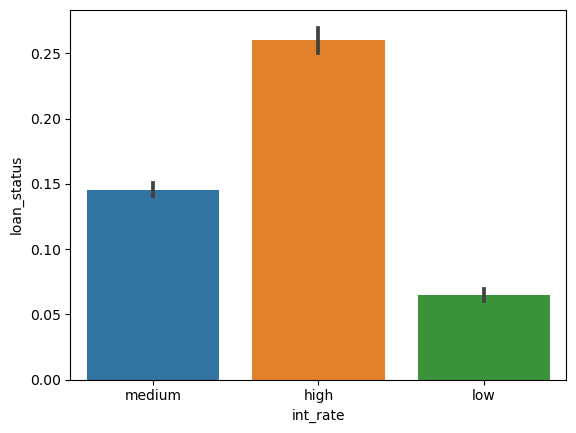

In [56]:
plot_cat('int_rate')

<b>When there is high int rate we see there are more defaulters</b>

In [57]:
# funded amount
def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'
    
loan_data_cleaned['funded_amnt'] = loan_data_cleaned['funded_amnt'].apply(lambda x: funded_amount(x))

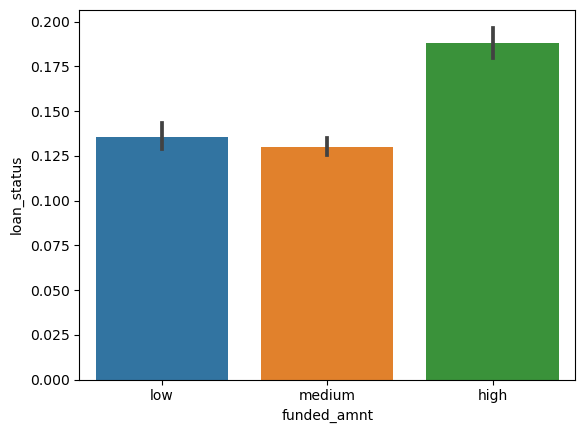

In [58]:
plot_cat('funded_amnt')

In [59]:
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

loan_data_cleaned['dti'] = loan_data_cleaned['dti'].apply(lambda x: dti(x))

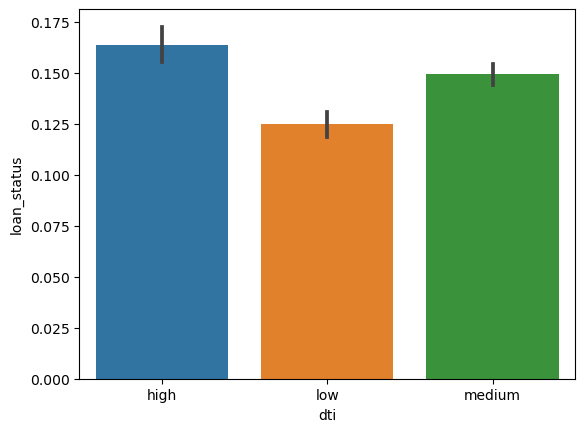

In [60]:
plot_cat('dti')

In [61]:
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

loan_data_cleaned['annual_inc'] = loan_data_cleaned['annual_inc'].apply(lambda x: annual_income(x))

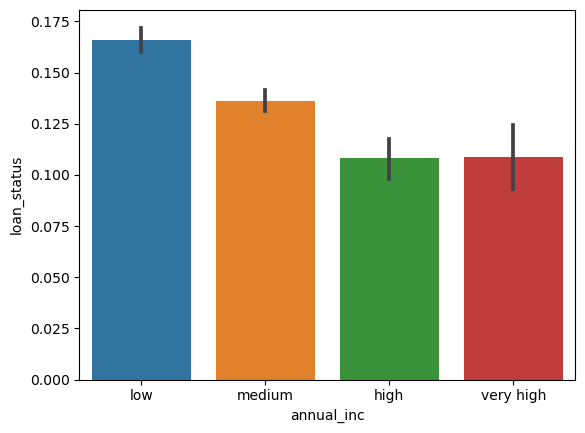

In [62]:
plot_cat('annual_inc')

<b>When the annual_inc is low we tend to see default rate being more</b>

In [63]:
# employment length
# let's remove all the null values from 'emp_length'
loan_data_cleaned = loan_data_cleaned[~loan_data_cleaned['emp_length'].isnull()]

# binning the variable
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

loan_data_cleaned['emp_length'] = loan_data_cleaned['emp_length'].apply(lambda x: emp_length(x))

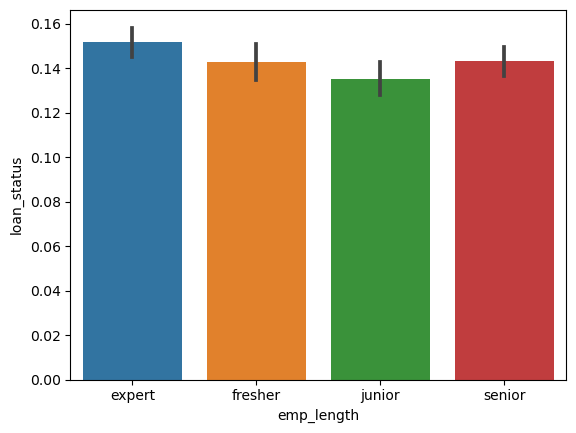

In [64]:
plot_cat('emp_length')

<b>The default rate is almost same for all different catgeories of employement year category</b>

## Segmented Univariate Analysis

We have now compared the default rates across various variables, and some of the important predictors are purpose of the loan, interest rate, annual income, grade etc.

In the credit industry, one of the most important factors affecting default is the purpose of the loan - home loans perform differently than credit cards, credit cards are very different from debt condolidation loans etc. 

This comes from business understanding, though let's again have a look at the default rates across the purpose of the loan.

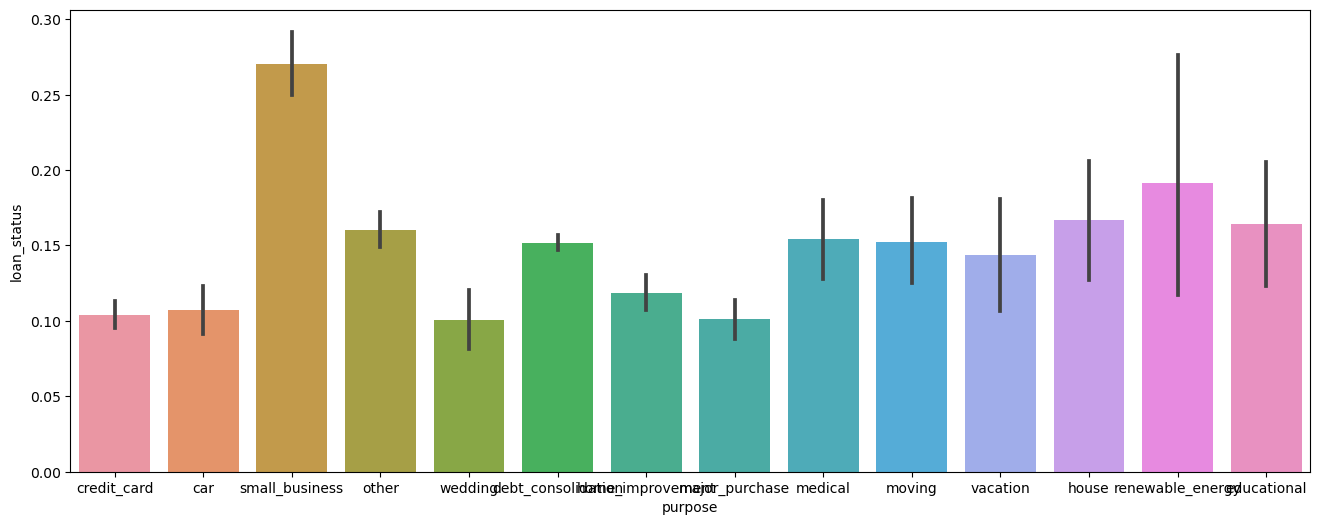

In [65]:
plt.figure(figsize=(16, 6))
plot_cat('purpose')

<b>Small business has more default rate compared with others</b>

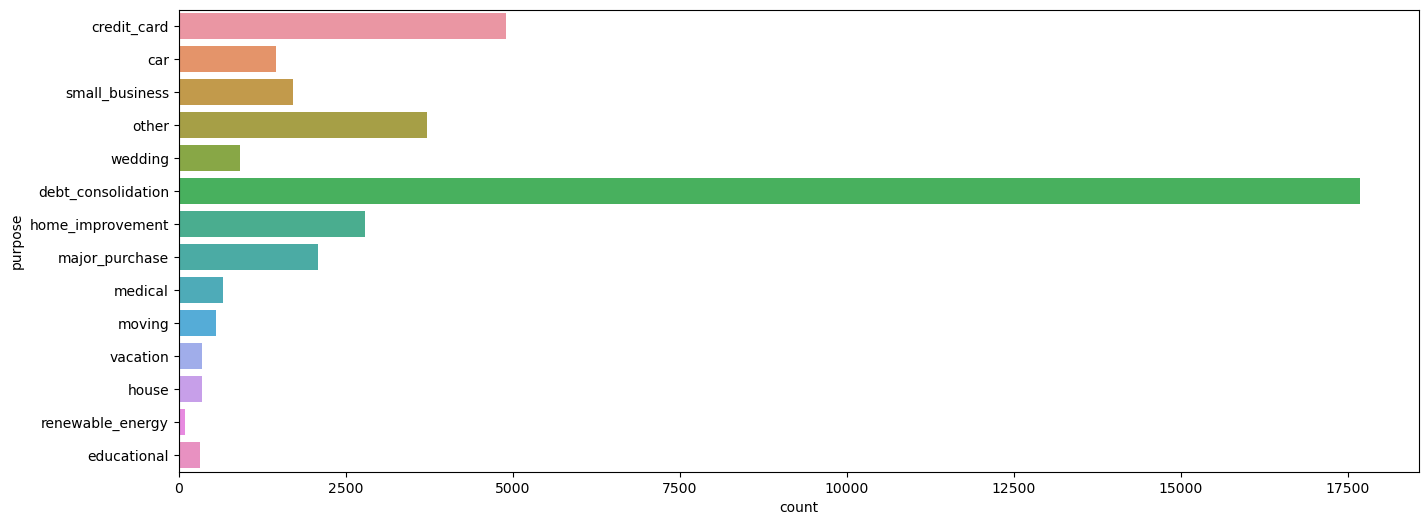

In [66]:
#lets check for the top four values which has higher count in Purpose
plt.figure(figsize=(16, 6))
sns.countplot(y='purpose',data=loan_data_cleaned)
plt.show()

<b>As we see debt_consolidatio,credit_card,home improvents and major purchase have higer count</b>

In [67]:
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
loan_data_cleaned = loan_data_cleaned[loan_data_cleaned['purpose'].isin(main_purposes)]
loan_data_cleaned['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: purpose, dtype: int64

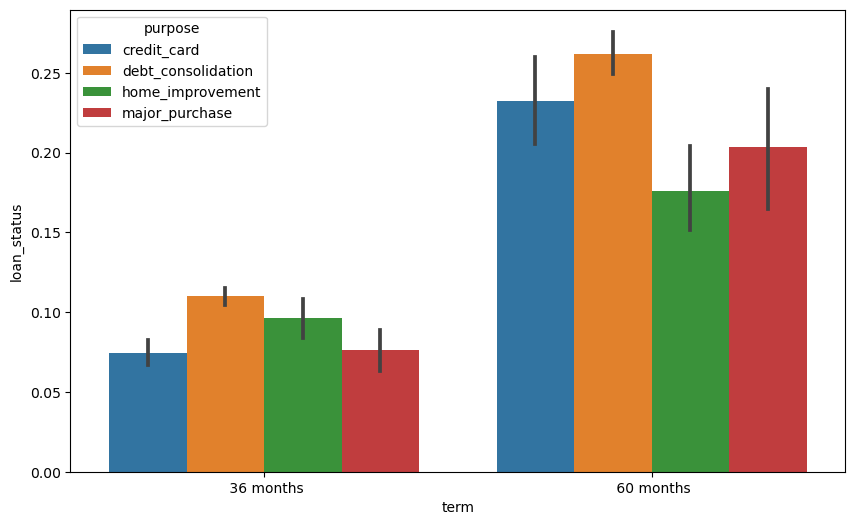

In [68]:
#lets compare default rates across multiple catgeorical values
plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="loan_status", hue='purpose', data=loan_data_cleaned)
plt.show()

<b>When the purpose is debt consolidatio or credit card and term is 60months we see that default rate is >0.25 and around 0.23 respectively</b>

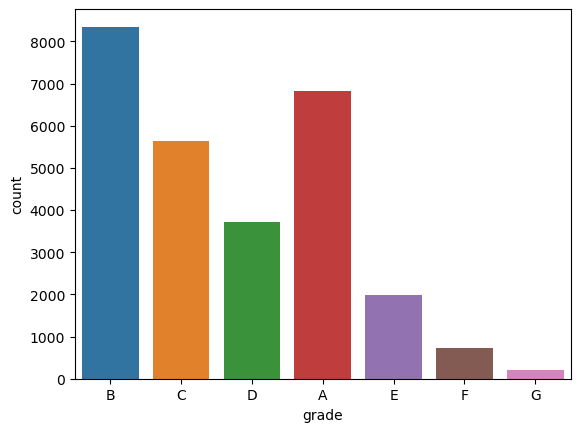

In [69]:
#lets check for the count of each grade
sns.countplot(x='grade', data=loan_data_cleaned)
plt.show()

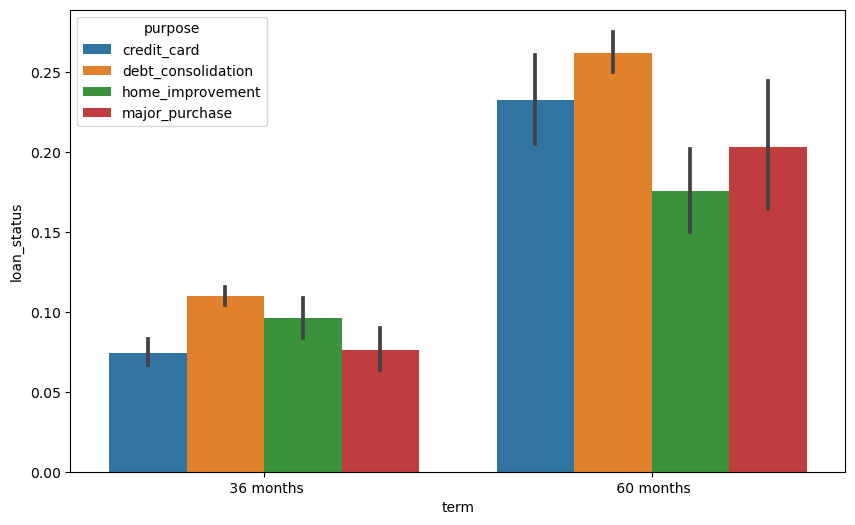

In [70]:
# lets write a function which takes a categorical variable and plots the default rate
# segmented by purpose 

def plot_segmented(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=loan_data_cleaned)
    plt.show()

    
plot_segmented('term')

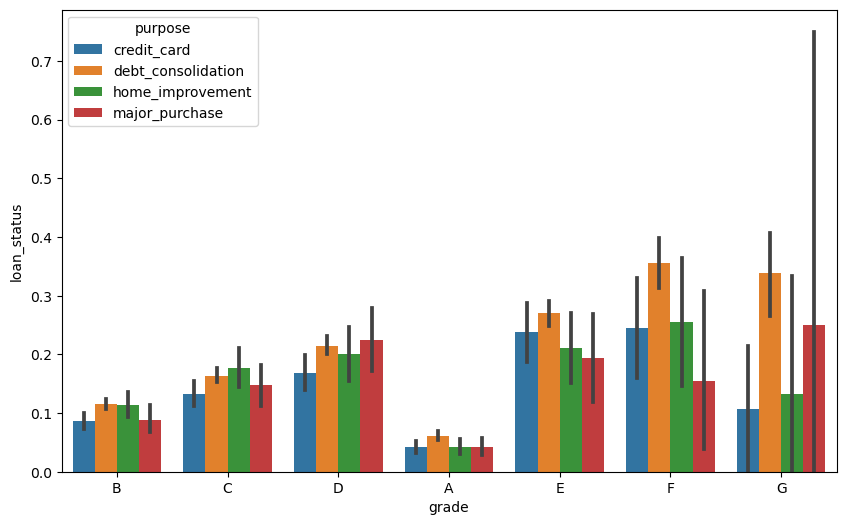

In [71]:
plot_segmented('grade')

<b>As we can see when grade is 'F' or "G" and purpose is debt consolidation the default rate is comparitevly high.</b>

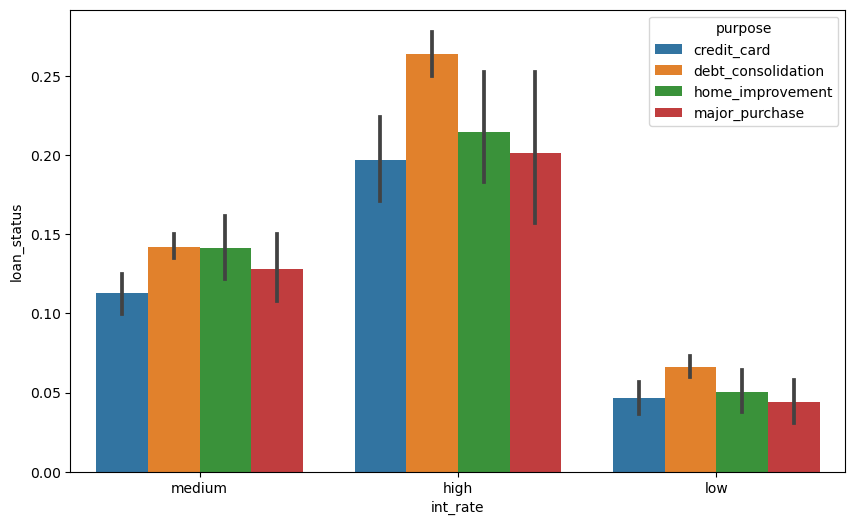

In [72]:
#lets check with int rate
plot_segmented('int_rate')

<b>When there is high int rate and purpose is debt consolidation the default rate is much higher</b>

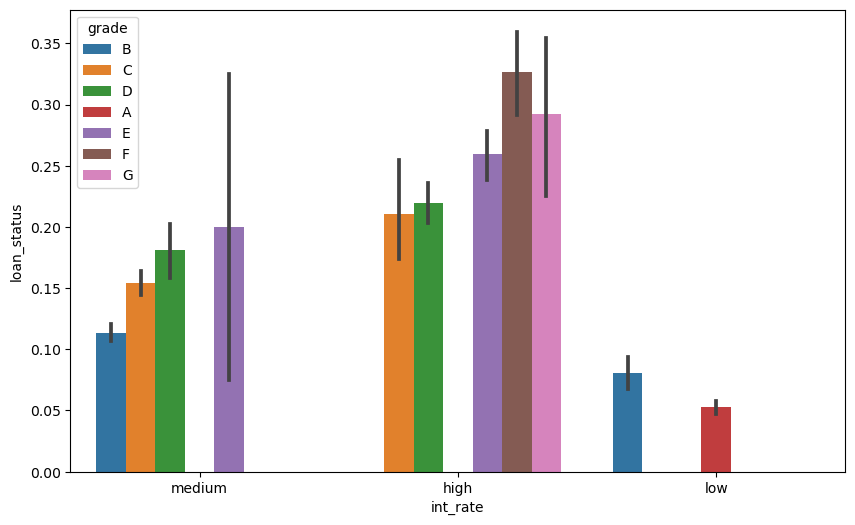

In [73]:
plt.figure(figsize=(10, 6))
sns.barplot(x='int_rate', y='loan_status', hue='grade', data=loan_data_cleaned)
plt.show()

<b>When int rate is high and grade is 'F', we see that the default rate is greater than 0.3</b>

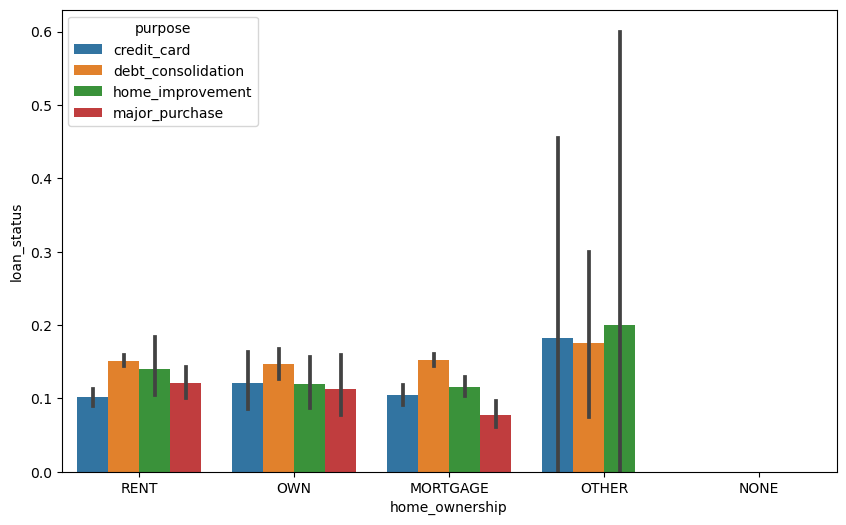

In [74]:
plot_segmented('home_ownership')

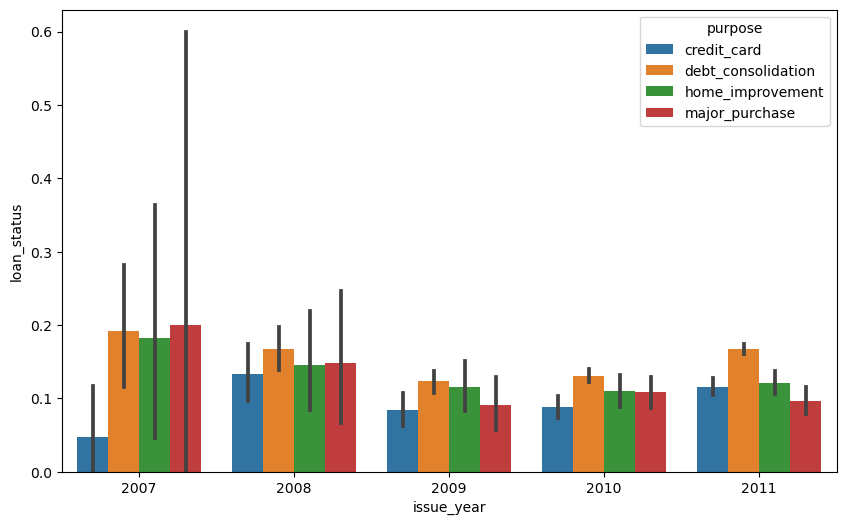

In [75]:
plot_segmented('issue_year')

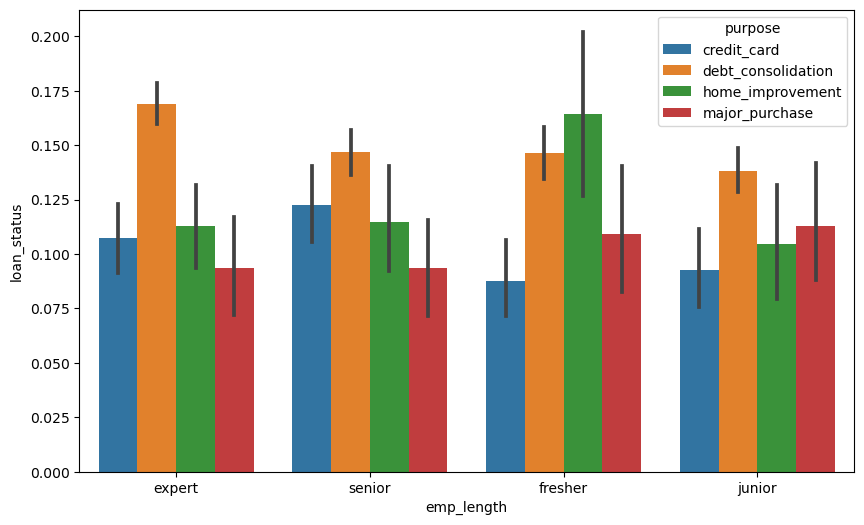

In [76]:
plot_segmented('emp_length')

In [77]:
#lets write a function to plot a graph using for catrgorical data
#segmented by grade
def plot_segmented_grade(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='grade', data=loan_data_cleaned)
    plt.show()

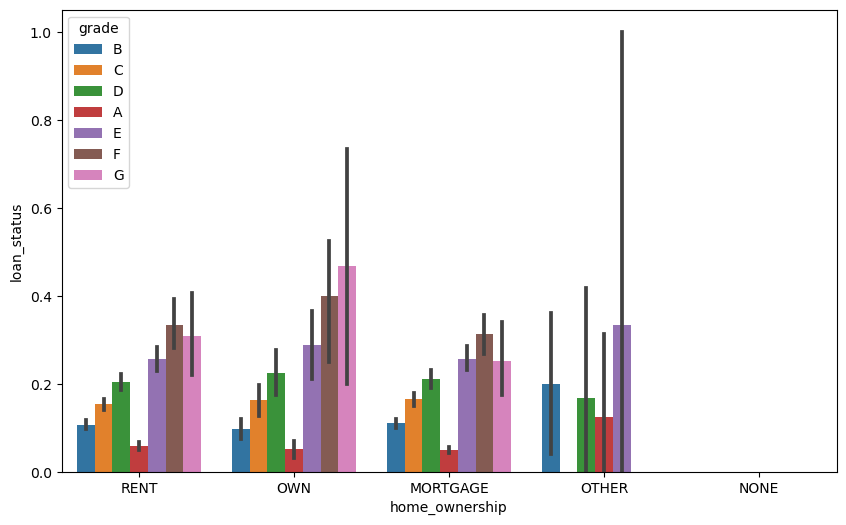

In [78]:
plot_segmented_grade('home_ownership')

<b>As we can see when the grade is 'G' and house ownership is 'own' there is a higher default rate(greater than 0.4)</b>

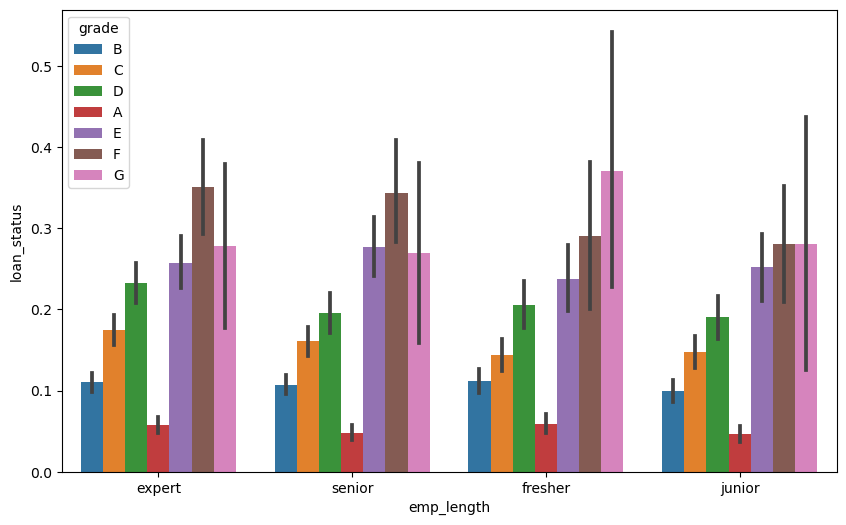

In [79]:
plot_segmented_grade('emp_length')

<b>When grade is 'F' and employee is a senior or expert the defualt rate is about 0.35 and when employee is fresher and grade is 'G' the default rate is above 0.35</b>

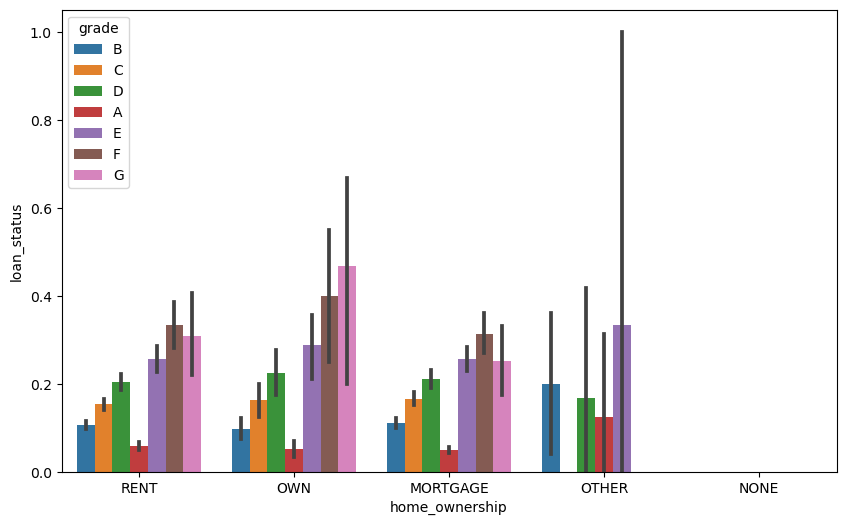

In [80]:
plot_segmented_grade('home_ownership')

<b>when grade is 'F','G' and home ownership is 'own' we see default rate reaching more than 0.4</b>

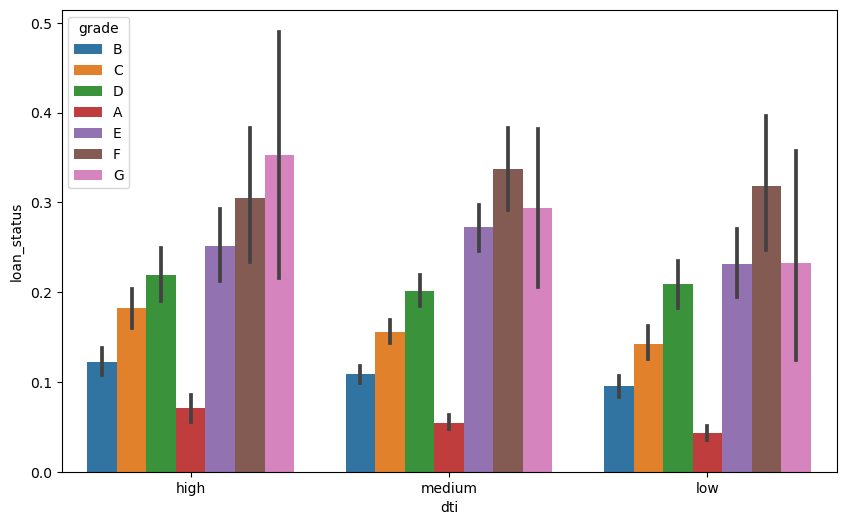

In [81]:
plot_segmented_grade('dti')

<b>whenever grade is 'F' and irrespective of dti category the default rate is grater than or equal to 0.3 and when Grade is 'G' and dti is medium the default rate is about 0.35</b>

In [82]:
#lets check how default rate varies across all Categorical variables
def diff_rate(cat_var):
    default_rates = loan_data_cleaned.groupby(cat_var).loan_status.mean().sort_values(ascending=False)
    return (round(default_rates, 2), round(default_rates[0] - default_rates[-1], 2))

default_rates, diff = diff_rate('annual_inc')
print(default_rates) 
print(diff)

annual_inc
low          0.16
medium       0.13
very high    0.10
high         0.10
Name: loan_status, dtype: float64
0.06


<b>The default rate variation from high to low is about 6% for annual_inc</b>

In [83]:
# filtering all the object type variables
df_categorical = loan_data_cleaned.loc[:, loan_data_cleaned.dtypes == object]
df_categorical['loan_status'] = loan_data_cleaned['loan_status']

# Now, for each variable, we can compute the incremental diff in default rates
print([i for i in loan_data_cleaned.columns])

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'pub_rec_bankruptcies', 'issue_month', 'issue_year']


In [84]:
# storing the diff of default rates for each column in a dict
d = {key: diff_rate(key)[1]*100 for key in df_categorical.columns if key != 'loan_status'}
print(d)

{'loan_amnt': 7.000000000000001, 'funded_amnt': 5.0, 'funded_amnt_inv': 6.0, 'term': 15.0, 'int_rate': 19.0, 'grade': 27.0, 'sub_grade': 46.0, 'emp_length': 2.0, 'home_ownership': 16.0, 'annual_inc': 6.0, 'verification_status': 4.0, 'purpose': 5.0, 'dti': 5.0}


<b>The default rate variation from high to low is about 27% for Grade</b><br>
<b>The default rate variation from high to low is about 19% for int_rate</b><br>
<b>The default rate variation from high to low is about 16% for home_ownership</b><br>
<b>The default rate variation from high to low is about 7% for loan_amnt</b>